In [1]:
#import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs

import matplotlib.pyplot as plt
from matplotlib import rcParams


In [2]:
#Load the data in numpy array
data = np.loadtxt(open('result.csv', 'rb'), delimiter=',')
x = data[:, 0:3]
y = data[:, 3]

In [3]:
#Split the data to training & test data. Test-size is 0.25(25%) of data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

In [4]:
#select the machine learning algorithm

#SVM
from sklearn import svm, datasets
#clf = svm.SVC()
clf = svm.SVC(kernel="linear",C=0.025)

In [5]:
#Train the ML Algo with training data
clf.fit(x_train, y_train)

SVC(C=0.025, kernel='linear')

In [6]:
#Pass the test data for classify or predict
classifier_predictions = clf.predict(x_test)

In [7]:
#Calculate the accuracy from the the prediction result.
#print("Accuracy is ", accuracy_score(y_test, classifier_predictions)*100)
ma_svm = clf.score(x_test,y_test)
recall_svm = rs(y_test,classifier_predictions)
precision_svm = ps(y_test,classifier_predictions)
f1_svm = fs(y_test,classifier_predictions)
print('*** Evaluation metrics for test dataset ***\n')
print('Accuracy: ',ma_svm)
print('Recall Score: ',recall_svm)
print('Precision Score: ',precision_svm)
print('F1 Score: ',f1_svm)


*** Evaluation metrics for test dataset ***

Accuracy:  0.9478260869565217
Recall Score:  0.9777777777777777
Precision Score:  0.8979591836734694
F1 Score:  0.9361702127659575


Text(0.5, 1.0, 'Evaluation Metrics for SVM')

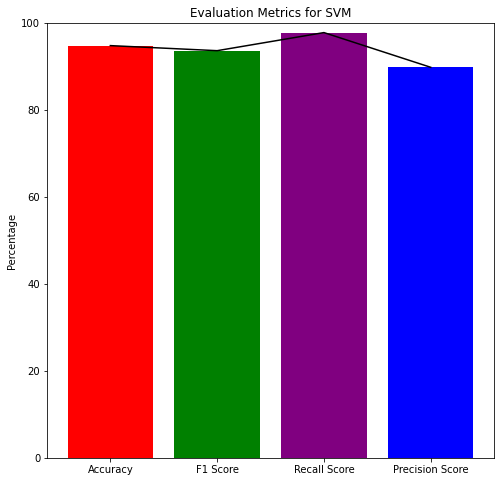

In [8]:
a = pd.DataFrame(y_test)
a['classifier_predictions']= clf.predict(x_test)
#print('\n\tTable 3\n')
#print(a.head())

rcParams['figure.figsize']=8,8
plt.plot(figsize=(40,20))
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_svm*100,f1_svm*100,recall_svm*100,precision_svm*100],color=['red','green','purple','blue'])
plt.plot([ma_svm*100,f1_svm*100,recall_svm*100,precision_svm*100],color='black')
plt.ylabel("Percentage")
plt.ylim([0,100])
plt.title('Evaluation Metrics for SVM')


In [9]:
#Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(max_depth=2)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)
classifier.fit(x_train,np.array(y_train).reshape(y_train.shape[0],1))

DecisionTreeClassifier(max_depth=2)

In [11]:
pred = np.array(classifier.predict(x_test))
recall_dtc = rs(y_test,pred)
precision_dtc = ps(y_test,pred)
f1_dtc = fs(y_test,pred)
ma_dtc = classifier.score(x_test,y_test)

print('*** Evaluation metrics for test dataset ***\n')
print('Accuracy: ',ma_dtc)
print('Recall Score: ',recall_dtc)
print('Precision Score: ',precision_dtc)
print('F1 Score: ',f1_dtc)

a = pd.DataFrame(y_test)
a['pred']= classifier.predict(x_test)

*** Evaluation metrics for test dataset ***

Accuracy:  0.9347826086956522
Recall Score:  0.9210526315789473
Precision Score:  0.9210526315789473
F1 Score:  0.9210526315789473


(0.0, 100.0)

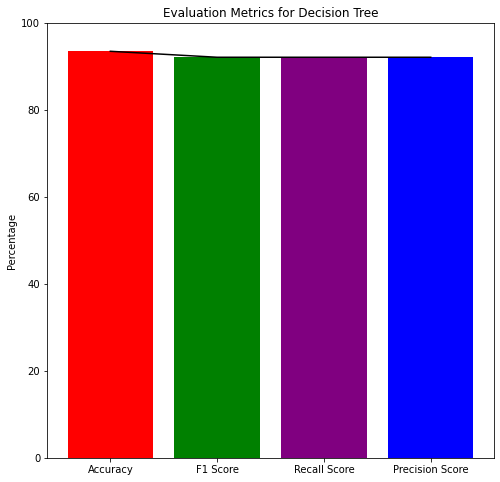

In [12]:
rcParams['figure.figsize']=8,8
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_dtc*100,f1_dtc*100,recall_dtc*100,precision_dtc*100],color=['red','green','purple','blue'])
plt.plot([ma_dtc*100,f1_dtc*100,recall_dtc*100,precision_dtc*100],color='black')
plt.title('Evaluation Metrics for Decision Tree')
plt.ylabel("Percentage")
plt.ylim([0,100])

In [13]:
#Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")
rf = RandomForestClassifier(max_depth=2)
classifier = AdaBoostClassifier(rf)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
classifier.fit(x_train,np.array(y_train).reshape(y_train.shape[0],1))

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2))

In [15]:
pred = np.array(classifier.predict(x_test))

recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = classifier.score(x_test,y_test)

print('*** Evaluation metrics for test dataset ***\n')
print('Accuracy: ',ma)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)

*** Evaluation metrics for test dataset ***

Accuracy:  0.9347826086956522
Recall Score:  0.9714285714285714
Precision Score:  0.8717948717948718
F1 Score:  0.9189189189189189


Text(0.5, 1.0, 'Evaluation Metrics for Random Forest')

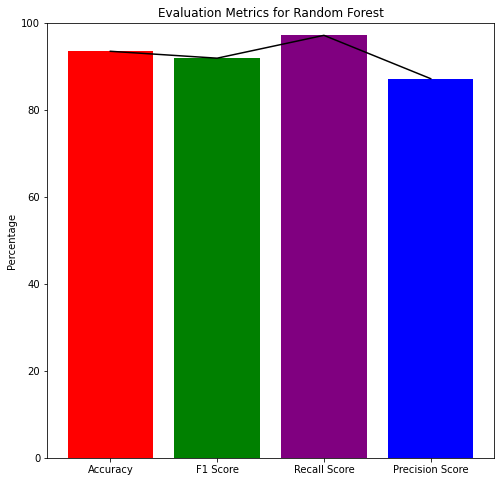

In [16]:
rcParams['figure.figsize']=8,8
plt.ylim([0,100])
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma*100,f1*100,recall*100,precision*100],color=['red','green','purple','blue'])
plt.plot([ma*100,f1*100,recall*100,precision*100],color='black')
plt.ylabel("Percentage")
plt.title('Evaluation Metrics for Random Forest')

In [17]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
classifier.fit(x_train,y_train)

GaussianNB()

In [18]:
pred = np.array(classifier.predict(x_test))
recall_gnb = rs(y_test,pred)
precision_gnb = ps(y_test,pred)
f1_gnb = fs(y_test,pred)
ma_gnb = classifier.score(x_test,y_test)

print('*** Evaluation metrics for test dataset ***\n')
print('Accuracy: ',ma_gnb)
print('Recall Score: ',recall_gnb)
print('Precision Score: ',precision_gnb)
print('F1 Score: ',f1_gnb)

*** Evaluation metrics for test dataset ***

Accuracy:  0.9456521739130435
Recall Score:  1.0
Precision Score:  0.875
F1 Score:  0.9333333333333333


Text(0.5, 1.0, 'Evaluation Metrics for Naive Bayes')

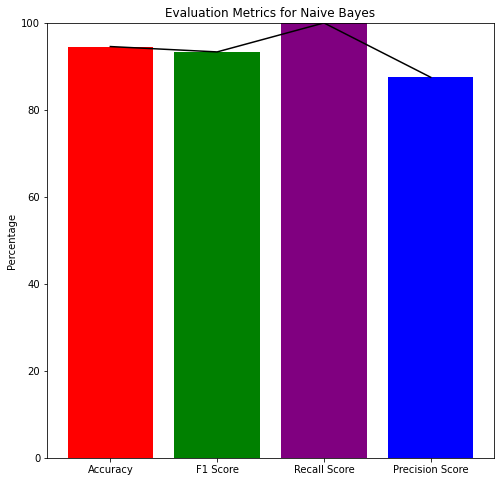

In [19]:
rcParams['figure.figsize']=8,8
plt.ylim([0,100])
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_gnb*100,f1_gnb*100,recall_gnb*100,precision_gnb*100],color=['red','green','purple','blue'])
plt.plot([ma_gnb*100,f1_gnb*100,recall_gnb*100,precision_gnb*100],color='black')
plt.ylabel("Percentage")
plt.title('Evaluation Metrics for Naive Bayes')


In [20]:
#Comparison of Evaluation Metrics

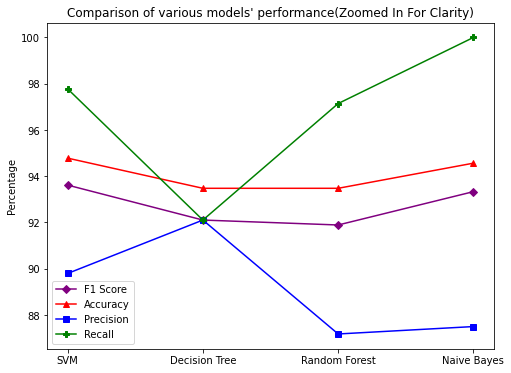

In [21]:
fig = plt.figure(figsize=(8,6))
plt.plot(['SVM','Decision Tree','Random Forest','Naive Bayes'],[f1_svm*100,f1_dtc*100,f1*100,f1_gnb*100],color='purple',marker='D')
plt.plot(['SVM','Decision Tree','Random Forest','Naive Bayes'],[ma_svm*100,ma_dtc*100,ma*100, ma_gnb*100],color='red',marker='^')
plt.plot(['SVM','Decision Tree','Random Forest','Naive Bayes'],[precision_svm*100,precision_dtc*100,precision*100, precision_gnb*100],color='blue',marker='s')
plt.plot(['SVM','Decision Tree','Random Forest','Naive Bayes'],[recall_svm*100,recall_dtc*100,recall*100, recall_gnb*100],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance(Zoomed In For Clarity)')
plt.ylabel("Percentage")
plt.show(fig)

(0.0, 100.0)

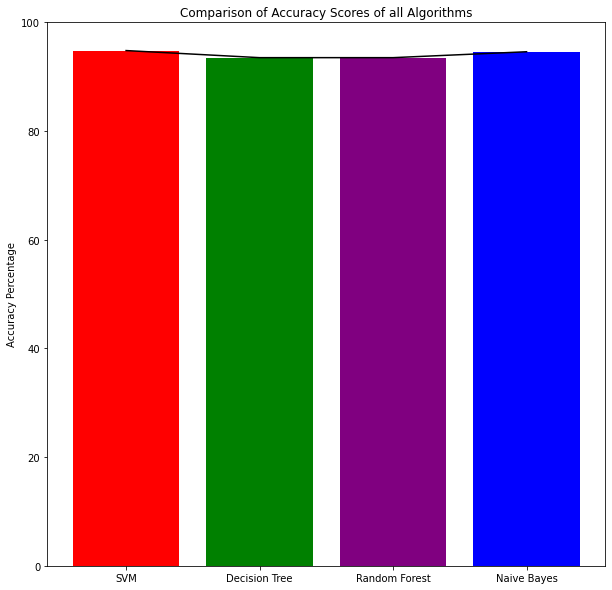

In [22]:
rcParams['figure.figsize']=10,10

plt.bar(['SVM','Decision Tree','Random Forest', 'Naive Bayes'],[ma_svm*100,ma_dtc*100,ma*100,ma_gnb*100],color=['red','green','purple','blue'])
plt.plot([ma_svm*100,ma_dtc*100,ma*100,ma_gnb*100],color='black')
plt.title('Comparison of Accuracy Scores of all Algorithms')
plt.ylabel("Accuracy Percentage")
plt.ylim([0,100])